In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [12]:
parser = Sbopen()
pd.set_option('display.max_columns', None)

df, related, freeze, tactics = parser.event(69301)

team1, team2 = df.team_name.unique()
print(team1, " vs ", team2)

pass_df = df.loc[df['type_name'] == 'Pass'].set_index('id')
pass_df.head()

England Women's  vs  Sweden Women's


,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,under_pressure,outcome_id,outcome_name,out,counterpress,pass_deflected,pass_switch,technique_id,technique_name,pass_cross,off_camera,shot_statsbomb_xg,end_z,shot_first_time,goalkeeper_position_id,goalkeeper_position_name,ball_recovery_recovery_failure,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,foul_won_defensive,aerial_won,pass_goal_assist,substitution_replacement_id,substitution_replacement_name,foul_committed_offensive,shot_one_on_one,dribble_overrun,block_deflection,pass_cut_back,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
760528a6-2de2-427f-9795-b2b19819ef1f,5,1,00:00:00.140000,0,0,2,0.168730,69301,30,Pass,865,England Women's,9,From Kick Off,865,England Women's,NaN,10180.0,Ellen White,23.0,Center Forward,4641.0,Francesca Kirby,2.102380,0.442374,1.0,Ground Pass,61.9,40.9,40.0,Right Foot,65.0,Kick Off,60.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ecec23b8-f03d-4bee-80df-9fabec558187,9,1,00:00:05.143000,0,5,2,1.173625,69301,30,Pass,865,England Women's,9,From Kick Off,865,England Women's,NaN,4641.0,Francesca Kirby,15.0,Left Center Midfield,10178.0,Lucy Bronze,21.317833,1.769112,1.0,Ground Pass,78.4,58.5,40.0,Right Foot,NaN,NaN,82.6,37.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bdedb943-ddac-42ab-bc8b-756faa49d9e6,12,1,00:00:07.844000,0,7,2,1.019100,69301,30,Pass,865,England Women's,9,From Kick Off,865,England Women's,NaN,10178.0,Lucy Bronze,2.0,Right Back,4654.0,Nikita Parris,18.984203,0.725767,1.0,Ground Pass,98.9,77.9,40.0,Right Foot,NaN,NaN,84.7,65.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456a1ae6-1fe8-4ffc-952b-152a7f89e1d2,15,1,00:00:10.586000,0,10,2,0.700000,69301,30,Pass,865,England Women's,9,From Kick Off,865,England Women's,NaN,4654.0,Nikita Parris,12.0,Right Midfield,10172.0,Jill Scott,11.287161,-1.695151,1.0,Ground Pass,93.3,64.3,40.0,Right Foot,NaN,NaN,94.7,75.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a8d0155f-260c-4470-b842-b474ea58ffa7,19,1,00:00:11.326000,0,11,2,4.150000,69301,30,Pass,865,England Women's,9,From Kick Off,865,England Women's,NaN,10172.0,Jill Scott,13.0,Right Center Midfield,NaN,NaN,25.223997,-0.403330,1.0,Ground Pass,117.4,54.7,40.0,Right Foot,NaN,NaN,94.2,64.6,NaN,9.0,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


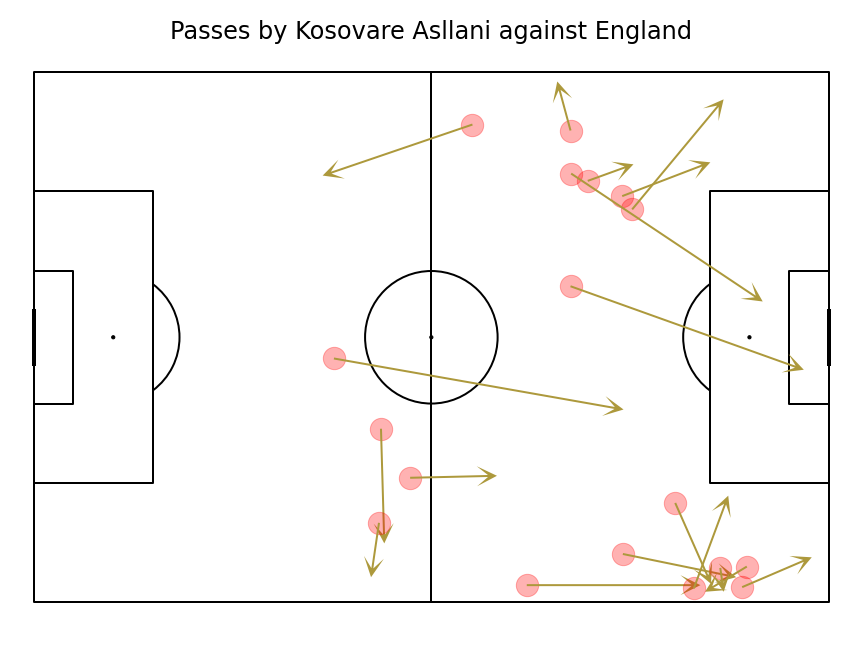

In [22]:
pitch = Pitch(line_color="black")
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

mask_sweden = (df.type_name == 'Pass') & (df.team_name == team2)
df_sweden = df.loc[mask_sweden, ['x', 'y', 'end_x', 'end_y', 'player_name', 'outcome_name']]

for idx, row in df_sweden.iterrows():
    if row["player_name"] == "Kosovare Asllani":
        pitch.scatter(row.x, row.y, alpha = 0.3, s=500, color="red", ax=ax['pitch'])
        pitch.arrows(row.x, row.y, row.end_x, row.end_y, width=2, headwidth=10, 
        headlength=10, color='#ad993c', ax=ax["pitch"])

fig.suptitle("Passes by Kosovare Asllani against England", fontsize=24)
plt.show()